# Task 4: Insights and Recommendations

In [1]:
import sys
import os
import pandas as pd
from glob import glob

In [2]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [3]:
# import the module
# In this task, we will load the cleaned the dataset for further analysis.
# First, we will load the module for data loading
from src.data_loader import DataLoader
import src.data_loader
reload(src.data_loader)

<module 'src.data_loader' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\data_loader.py'>

In [4]:
data_path='../data/analyzed/'
# Load the dataset
data_loader = DataLoader(data_path)
data = data_loader.load_data('cleaned_review_data.csv')

In [5]:
# import module for visualization
from src.sentiment_analysis.visualization import SentimentVisualizer
import src.sentiment_analysis.visualization
# Reload the module to ensure we have the latest version
reload(src.sentiment_analysis.visualization)

<module 'src.sentiment_analysis.visualization' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\sentiment_analysis\\visualization.py'>

### Visualizations

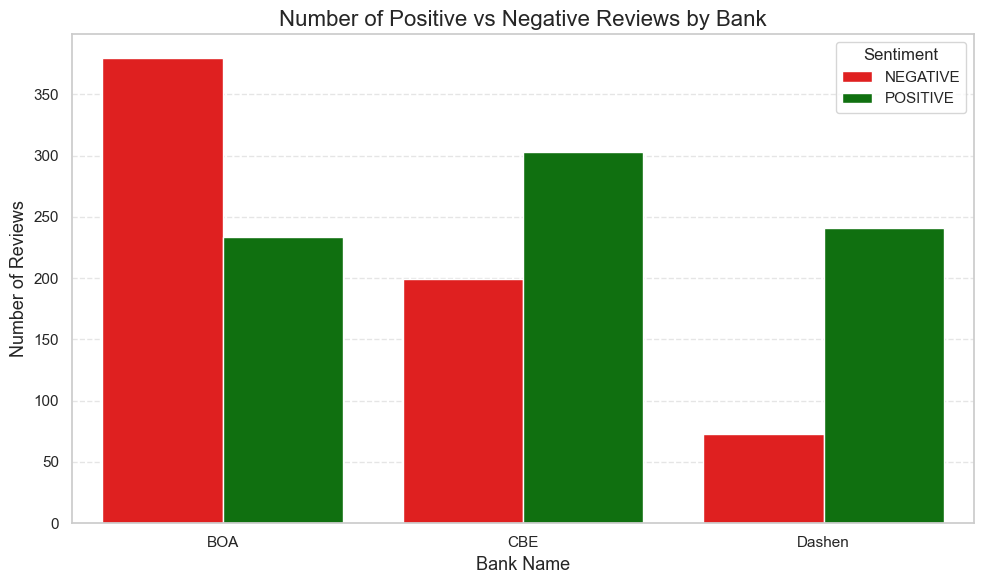

In [6]:
# initialize the visualizer
visualizer = SentimentVisualizer()
visualizer.plot_sentiment_distribution(data)


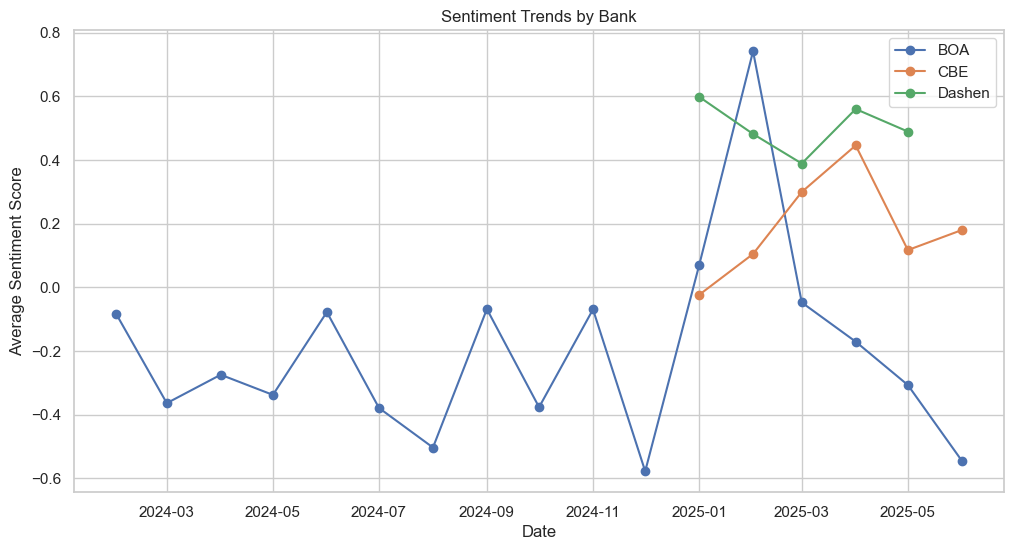

In [7]:
# plot sentiment over time
visualizer.plot_sentiment_trends(data)

In [21]:
# loading the modules for thematic analysis
from src.thematic_analysis.thematic_analysis import ThematicAnalyzer
import src.thematic_analysis.thematic_analysis
# Reload the module to ensure we have the latest version
reload(src.thematic_analysis.thematic_analysis)

<module 'src.thematic_analysis.thematic_analysis' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\thematic_analysis\\thematic_analysis.py'>

In [22]:
# initialize the thematic analyzer
thematic_analyzer = ThematicAnalyzer()

In [23]:
# Filter positive and negative reviews per bank
positive_reviews_per_bank = data[data['sentiment'] == 'POSITIVE']
negative_reviews_per_bank = data[data['sentiment'] == 'NEGATIVE']
# top keywords in positive reviews per bank
positive_keywords_per_bank = thematic_analyzer.extract_bank_keywords(positive_reviews_per_bank)
# Display top keywords in positive reviews per bank
for bank, keywords in positive_keywords_per_bank.items():
    print(f"\nTop keywords in positive reviews for {bank}:")
    print(keywords)
# top keywords in negative reviews per bank
negative_keywords_per_bank = thematic_analyzer.extract_bank_keywords(negative_reviews_per_bank)
# Display top keywords in negative reviews per bank
for bank, keywords in negative_keywords_per_bank.items():
    print(f"\nTop keywords in negative reviews for {bank}:")
    print(keywords)


Top keywords in positive reviews for BOA:
['abyssinia' 'amazing' 'app' 'application' 'apps' 'awesome' 'bank'
 'banking' 'best' 'better' 'boa' 'ca' 'cbe' 'customer' 'day' 'developer'
 'easy' 'ethiopia' 'fast' 'feature' 'functional' 'good' 'great' 'improve'
 'like' 'make' 'mobile' 'money' 'need' 'new' 'nice' 'open' 'option'
 'previous' 'properly' 'really' 'service' 'thanks' 'time' 'transaction'
 'transfer' 'update' 'updated' 'use' 'user' 'using' 'version' 'work'
 'working' 'wow']

Top keywords in positive reviews for CBE:
['account' 'amazing' 'app' 'application' 'apps' 'bank' 'banking' 'best'
 'ca' 'cbe' 'easy' 'ethiopia' 'excellent' 'fantastic' 'fast' 'feature'
 'fix' 'friendly' 'good' 'great' 'happy' 'interesting' 'life' 'like'
 'love' 'make' 'mobile' 'money' 'new' 'nice' 'payment' 'reliable' 'save'
 'screenshot' 'secure' 'service' 'simple' 'thank' 'thanks' 'time'
 'transaction' 'transfer' 'update' 'use' 'useful' 'user' 'using' 'work'
 'working' 'wow']

Top keywords in positive review

In [25]:
# remove the common keywords from both positive and negative reviews per bank
bank_keywords = thematic_analyzer.extract_bank_keywords(data)
for bank in bank_keywords.keys():
    bank_common_keywords = set(positive_keywords_per_bank.get(bank, [])) & set(negative_keywords_per_bank.get(bank, []))
    positive_keywords_per_bank[bank] = [kw for kw in positive_keywords_per_bank[bank] if kw not in bank_common_keywords]
    negative_keywords_per_bank[bank] = [kw for kw in negative_keywords_per_bank[bank] if kw not in bank_common_keywords]

In [26]:
# display the final keywords per bank
for bank in bank_keywords.keys():
    print(f"\nFinal keywords for {bank}:")
    print("Positive:", positive_keywords_per_bank.get(bank, []))
    print("Negative:", negative_keywords_per_bank.get(bank, []))


Final keywords for BOA:
Positive: ['abyssinia', 'amazing', 'awesome', 'best', 'cbe', 'easy', 'ethiopia', 'fast', 'feature', 'functional', 'great', 'improve', 'new', 'nice', 'previous', 'really', 'thanks', 'updated', 'user', 'wow']
Negative: ['account', 'bad', 'bug', 'crash', 'error', 'experience', 'fix', 'issue', 'know', 'login', 'otp', 'phone', 'poor', 'problem', 'say', 'seen', 'slow', 'try', 'used', 'worst']

Final keywords for CBE:
Positive: ['amazing', 'apps', 'best', 'easy', 'excellent', 'fantastic', 'fast', 'friendly', 'great', 'happy', 'interesting', 'life', 'love', 'nice', 'payment', 'reliable', 'save', 'secure', 'simple', 'thank', 'thanks', 'useful', 'user', 'wow']
Negative: ['access', 'annoying', 'bad', 'better', 'bug', 'crash', 'crashing', 'developer', 'issue', 'look', 'mode', 'need', 'network', 'open', 'option', 'problem', 'reason', 'say', 'security', 'send', 'thing', 'turn', 'used', 'worst']

Final keywords for Dashen:
Positive: ['ahead', 'amazing', 'best', 'convenient', 

In [34]:
# Word cloud for positive reviews
# load module for word cloud visualization
from src.thematic_analysis.visualization import ThematicVisualizer
import src.thematic_analysis.visualization  
# Reload the module to ensure we have the latest version
reload(src.thematic_analysis.visualization)

<module 'src.thematic_analysis.visualization' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\thematic_analysis\\visualization.py'>


Word cloud for BOA:


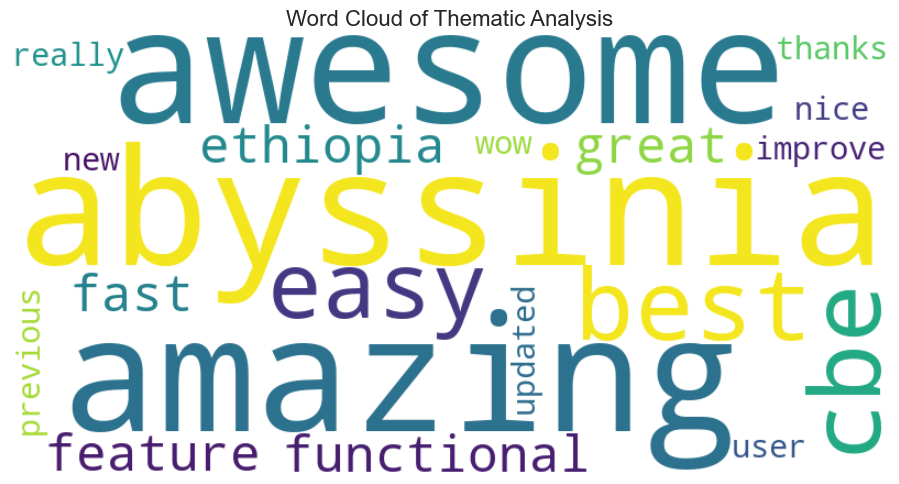

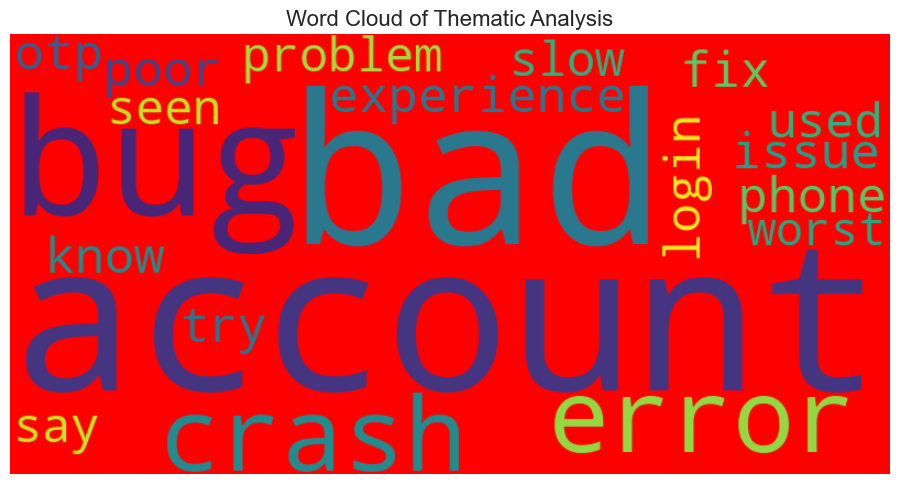


Word cloud for CBE:


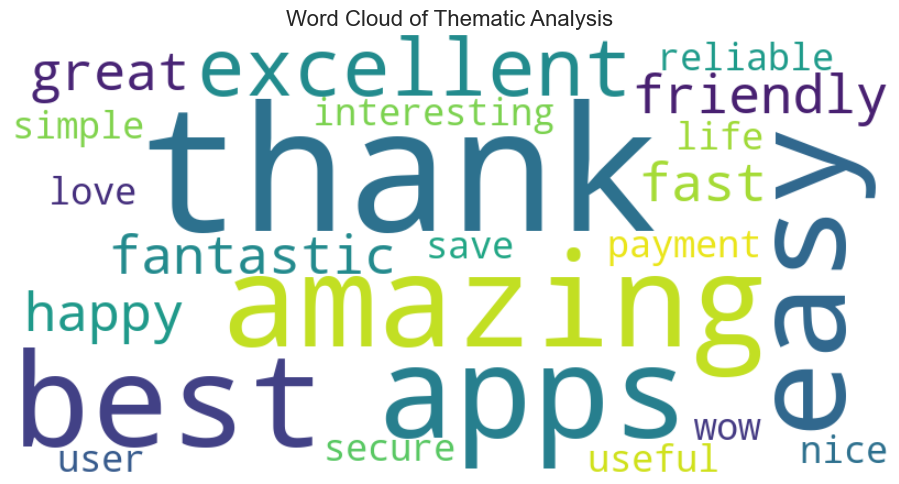

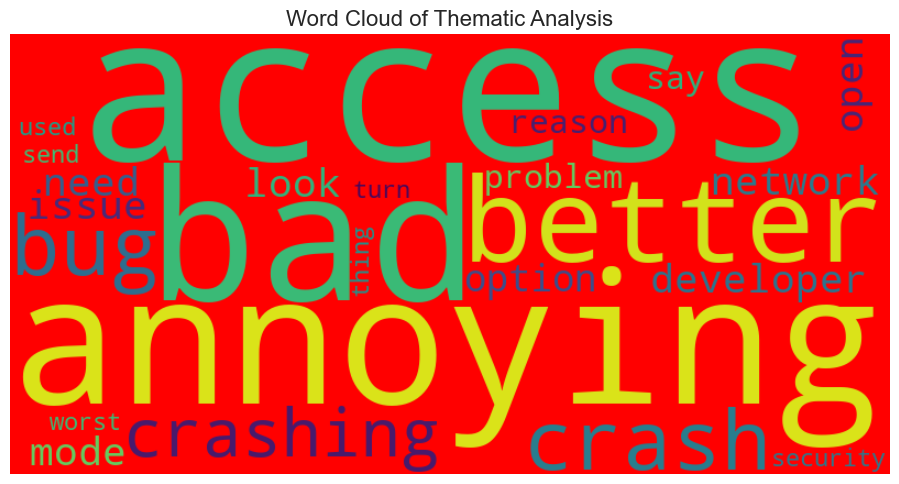


Word cloud for Dashen:


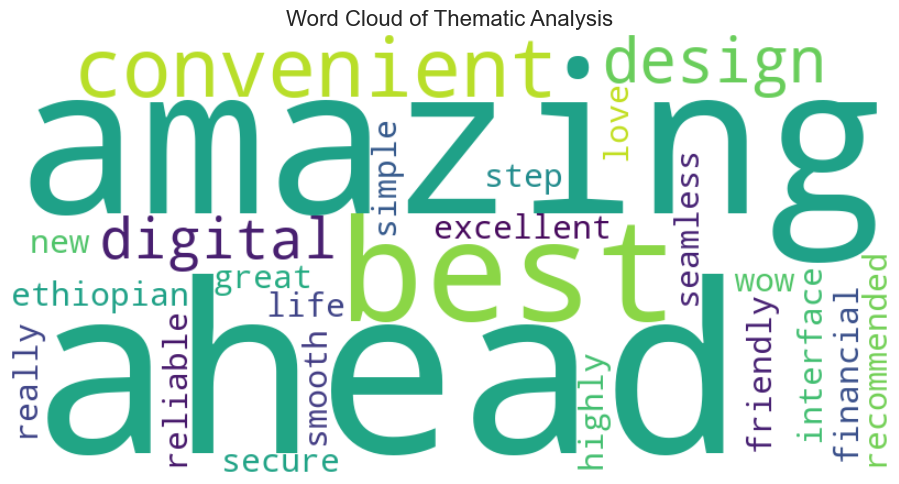

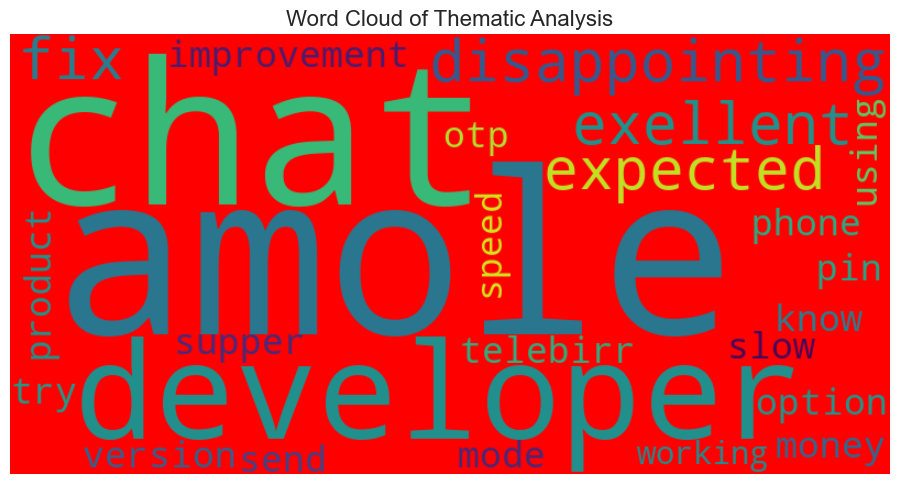

In [35]:
# initialize the thematic visualizer
thematic_visualizer = ThematicVisualizer()
# Generate word cloud for each bank
for bank in bank_keywords.keys():
    print(f"\nWord cloud for {bank}:")
    # Plot word cloud for positive and negative keywords
    thematic_visualizer.plot_wordcloud(" ".join(positive_keywords_per_bank.get(bank, [])),color='white')
    thematic_visualizer.plot_wordcloud(" ".join(negative_keywords_per_bank.get(bank, [])),color='red')

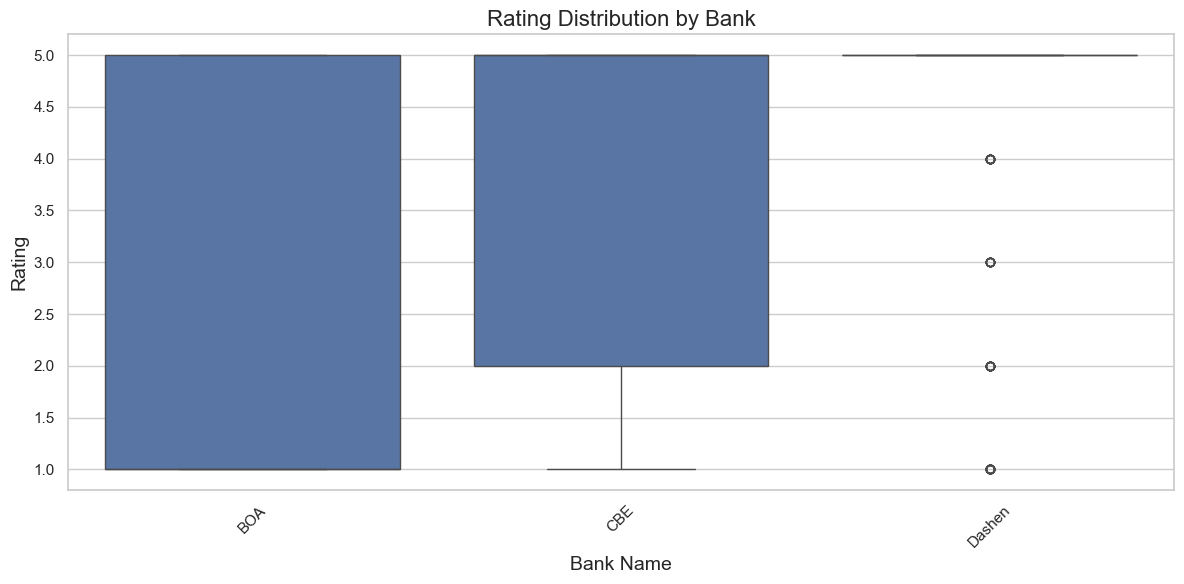

In [36]:
# visualize rating distribution
thematic_visualizer.plot_rating_distribution(data)